In [7]:
import pandas as pd
import numpy as np

In [20]:
results_path = '../MLmethods/gem_candidates_final.csv'
results_df = pd.read_csv(results_path)
results_df

,business_id,gem_score_predict
0,kWbCmkx7Pd1kzHDT919FLA,1.300334
1,mgEDe8C777tgTsNg7o5z6g,1.250151
2,hcS499kBXC7gS2ZfKsbD4A,1.250091
3,CVeX9v44CyMbrx8kr0fQ8Q,1.249980
4,rqKCzXC272dWC0pr-D03SA,1.249784
...,...,...
77,SnII_EHa51aPSWeFATv8ZQ,0.950117
78,b8Xtx3cJgovamFrfoF3iVA,0.950050
79,YEoCF1Vs7as4szsYMJl1FQ,0.950014
80,n0CdVw9AEmVRAIy7i1F6ag,0.949920


In [21]:
business_path = '../city_filter/businesses_Indianapolis.csv'
business_df = pd.read_csv(business_path)
business_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
1,qhDdDeI3K4jy2KyzwFN53w,Barnes & Noble Booksellers,8675 River Crossing Blvd,Indianapolis,IN,46240.0,39.913820,-86.105739,4.0,38,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Books, Mags, Music & Video, Bookstores","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
2,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250.0,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,x1mhq4IpWctQOBM06dU8vg,Diamond Hair Company,5324 W 16th St,Indianapolis,IN,46224.0,39.787464,-86.251421,1.5,25,1,{'RestaurantsPriceRange2': '2'},"Hair Salons, Hair Extensions, Beauty & Spas, W...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
4,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,IN,46250.0,39.906295,-86.047463,3.5,257,1,"{'CoatCheck': 'False', 'Music': ""{'dj': False}...","Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,_oJ5QA131I_XnyaXAa8nsA,Starbucks,7800 Colonel H Weir Cook Memorial Dr,Indianapolis,IN,46241.0,39.715112,-86.297335,2.5,7,0,"{'BusinessParking': ""{'garage': False, 'street...","Food, Coffee & Tea","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
7542,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227.0,39.638245,-86.128069,4.0,29,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Fal...","Food, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
7543,Gi1QPLu_y8rLS3uTN9Z_VA,St. Vincent Heart Center of Indiana,10580 N Meridian St,Indianapolis,IN,46290.0,39.939489,-86.159502,3.0,12,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hospitals, Health & Medical","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
7544,fn3ybdsRSrIDpKZTsRuAWg,INSPcenter/Thai Clinical Massage,"2625 N Meridian St, Unit 50",Indianapolis,IN,46208.0,39.805057,-86.155975,4.0,12,1,"{'BusinessParking': ""{'garage': False, 'street...","Massage Therapy, Rolfing, Beauty & Spas, Refle...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:30..."


<Axes: ylabel='count'>

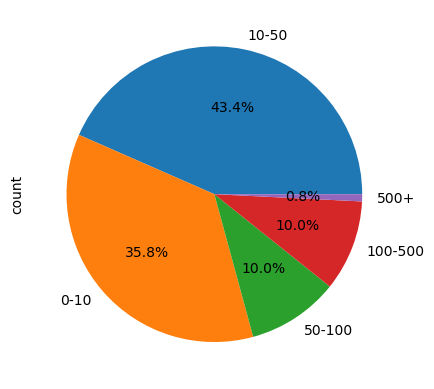

In [27]:
# 可视化business_df的评论数饼状图，0-10，10-50，50-100，100-500，500+
business_df['review_count'].describe()
bins = [0, 10, 50, 100, 500, np.inf]
labels = ['0-10', '10-50', '50-100', '100-500', '500+']
business_df['review_count_bins'] = pd.cut(business_df['review_count'], bins=bins, labels=labels)
business_df['review_count_bins'].value_counts().plot.pie(autopct='%1.1f%%')



In [24]:
# 从 business_df中获取results_df的信息
def get_info(row):
    business_id = row[0]
    name = business_df[business_df['business_id'] == business_id]['name'].values
    stars = business_df[business_df['business_id'] == business_id]['stars'].values
    attributes = business_df[business_df['business_id'] == business_id]['attributes'].values
    categories = business_df[business_df['business_id'] == business_id]['categories'].values
    hours = business_df[business_df['business_id'] == business_id]['hours'].values
    review_count = business_df[business_df['business_id'] == business_id]['review_count'].values
    latitude = business_df[business_df['business_id'] == business_id]['latitude'].values
    longitude = business_df[business_df['business_id'] == business_id]['longitude'].values
    return name, stars, attributes, categories, hours, review_count, latitude, longitude
    

In [25]:
# 将获取的信息添加到results_df中
results_df['name'] = ''
results_df['stars'] = ''
results_df['attributes'] = ''
results_df['categories'] = ''
results_df['hours'] = ''
results_df['review_count'] = ''
results_df['latitude'] = ''
results_df['longitude'] = ''
for index, row in results_df.iterrows():
    name, stars, attributes, categories, hours, review_count, latitude, longitude = get_info(row)
    results_df.at[index, 'name'] = name[0] if len(name) > 0 else ''
    results_df.at[index, 'stars'] = stars[0] if len(stars) > 0 else ''
    results_df.at[index, 'attributes'] = attributes[0] if len(attributes) > 0 else ''
    results_df.at[index, 'categories'] = categories[0] if len(categories) > 0 else ''
    results_df.at[index, 'hours'] = hours[0] if len(hours) > 0 else ''
    results_df.at[index, 'review_count'] = review_count[0] if len(review_count) > 0 else ''
    results_df.at[index, 'latitude'] = latitude[0] if len(latitude) > 0 else ''
    results_df.at[index, 'longitude'] = longitude[0] if len(longitude) > 0 else ''
results_df

/tmp/ipykernel_26256/78340411.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  business_id = row[0]


,business_id,gem_score_predict,name,stars,attributes,categories,hours,review_count,latitude,longitude
0,kWbCmkx7Pd1kzHDT919FLA,1.300334,La Eskina Indy,5.0,"{'RestaurantsTableService': 'True', 'Restauran...","Tacos, Bars, Mexican, Restaurants, Nightlife",NaN,5,39.757823,-86.146096
1,mgEDe8C777tgTsNg7o5z6g,1.250151,Snakeroot Botanicals,5.0,"{'AcceptsInsurance': 'False', 'BikeParking': '...","Nurseries & Gardening, Home & Garden, Vitamins...","{'Wednesday': '11:0-19:0', 'Thursday': '11:0-1...",5,39.752913,-86.140295
2,hcS499kBXC7gS2ZfKsbD4A,1.250091,Here Hair Studio,5.0,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Hair Salons, Men's Hair Salons, Hair Stylists,...","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21...",6,39.723019,-86.158027
3,CVeX9v44CyMbrx8kr0fQ8Q,1.249980,Foundry 317 Home Interiors,5.0,"{'WheelchairAccessible': 'False', 'BusinessPar...","Used, Vintage & Consignment, Home Services, Ho...","{'Monday': '0:0-0:0', 'Friday': '12:0-16:0', '...",8,39.870375,-86.144165
4,rqKCzXC272dWC0pr-D03SA,1.249784,Arby's,5.0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Fast Food, Sandwiches, Restaurants",NaN,5,39.915884,-86.22375
...,...,...,...,...,...,...,...,...,...,...
77,SnII_EHa51aPSWeFATv8ZQ,0.950117,Shop Tibet,4.5,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Jewelry, Shopping, Arts & Crafts","{'Tuesday': '11:0-19:0', 'Wednesday': '11:0-19...",8,39.870492,-86.143271
78,b8Xtx3cJgovamFrfoF3iVA,0.950050,Caffeine Crawl,5.0,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Local Flavor,NaN,9,39.851532,-86.263116
79,YEoCF1Vs7as4szsYMJl1FQ,0.950014,Endangered Species Chocolate,4.5,{'RestaurantsPriceRange2': '1'},"Specialty Food, Food, Chocolatiers & Shops","{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ...",7,39.885706,-86.263281
80,n0CdVw9AEmVRAIy7i1F6ag,0.949920,Luis's Fresh Market,4.0,"{'RestaurantsPriceRange2': '2', 'RestaurantsRe...","Mexican, Grocery, Restaurants, Food","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",5,39.79747,-86.024468


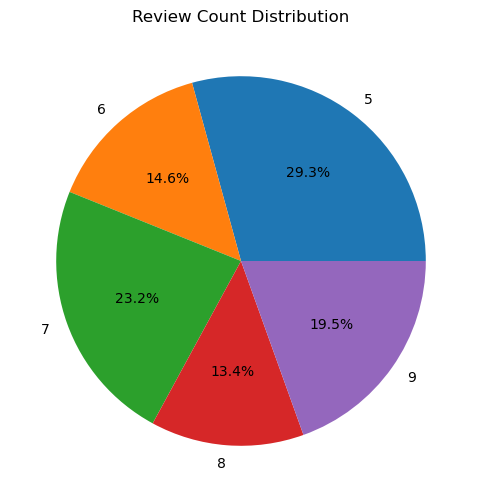

In [32]:
# 可视化82个商家的评论数饼状图 [5,6,7,8,9]
import matplotlib.pyplot as plt
import seaborn as sns
counts = []
for i in range(5, 10):
    counts.append(len(results_df[results_df['review_count'] == i]))

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=['5', '6', '7', '8', '9'], autopct='%1.1f%%')
plt.title('Review Count Distribution')
plt.show()


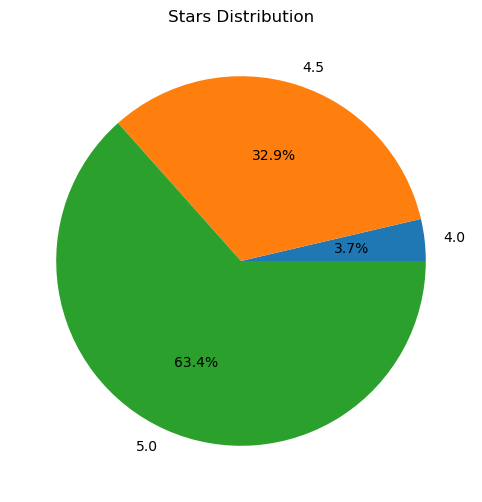

In [34]:
# 可视化stars的饼状图 4.0 4.5 5.0
star_counts = []
for i in [4.0, 4.5, 5.0]:
    star_counts.append(len(results_df[results_df['stars'] == i]))
plt.figure(figsize=(10, 6))
plt.pie(star_counts, labels=['4.0', '4.5', '5.0'], autopct='%1.1f%%')
plt.title('Stars Distribution')
plt.show()

In [37]:
# 从地图上标出这些商家
import folium
from folium.plugins import MarkerCluster

# 创建地图
# 获取中心点
latitude = results_df['latitude'].mean()
longitude = results_df['longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

# 添加商家标记
for index, row in results_df.iterrows():
    popup_str = f"Name: {row['name']}<br>Stars: {row['stars']}<br>Attributes: {row['attributes']}<br>Categories: {row['categories']}<br>Hours: {row['hours']}<br>Review Count: {row['review_count']}"
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=popup_str,
                  icon=folium.Icon(color='blue')).add_to(marker_cluster)

folium.LayerControl().add_to(m)
# 显示地图
m.save('gem_businesses_map.html')
m

In [38]:
#输出最终的商家信息
results_df.to_csv('gem_businesses_info.csv', index=False)